In [1]:
!pip install emoji
!pip install soynlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 23.8 MB/s eta 0:00:00


In [2]:
import pandas as pd

kold_df = pd.read_excel('/kaggle/input/kold-dataset/kold.xlsx')
print(len(kold_df))
kold_df.sample(10)

40429


,guid,source,date,title,comment,OFF,TGT,GRP,OFF_span,TGT_span,raw_labels
16368,kold-v1_16368,youtube,2021-08-17,Gay couple's the queer movie reaction [Your na...,오 이 영상만 10번 넘게 봤더니 ㅋㅋ 😂,False,NaN,NaN,NaN,NaN,"[{'offensiveness': False, 'annotator_id': 1906..."
13265,kold-v1_13265,naver_news,2021-04-20,손가락 절단도 ‘수술 거부’…HIV감염인의 차별받지 않을 권리는?,뭐도 뛰니까 아무대서나 막 뛰는구만,True,group,others-disease,뭐도 뛰니까 아무대서나 막 뛰는구만,NaN,"[{'offensiveness': True, 'annotator_id': 11634..."
15166,kold-v1_15166,youtube,2021-07-22,Majestic Korean SKIN CLINIC! Vlog,영알남님 끝날때 나오는 노래 대체 뭔가요?? ㅠㅠㅠ 너무 알고싶어요😭😭흑흑,False,NaN,NaN,NaN,NaN,"[{'offensiveness': False, 'annotator_id': 1875..."
34281,kold-v1_34281,youtube,2022-01-09,[글로벌K] 마네킹 참수 술 통제 돌아온 탈레반의 본색 / KBS 2022.01...,무자하딘 -).탈레반 / 빈라덴 . 미국 파키스탄 답답하다...,False,NaN,NaN,NaN,NaN,"[{'offensiveness': False, 'annotator_id': 1574..."
31664,kold-v1_31664,naver_news,2022-03-08,"우크라-러시아 3차 회담…""인도적 통로 개설 일부 진전""",러시아 이번에도 포격하면 진짜 이건 사람도 아니다. 진심으로 푸틴이 그냥 암살당하고...,True,individual,NaN,암살당하고,푸틴,"[{'offensiveness': True, 'annotator_id': 21466..."
1124,kold-v1_01124,youtube,2021-07-22,"[인터뷰] 배우 권해효, 나는 페미니스트다",아돌프 아이히만이 박애주의자라고 말하는게 더 신빙성있겠다 ㅋㅋ,True,group,others-feminist,아돌프 아이히만이 박애주의자라고 말하는게 더 신빙성있겠다 ㅋㅋ,NaN,"[{'offensiveness': True, 'annotator_id': 40, '..."
4861,kold-v1_04861,naver_news,2021-06-23,14년째 국회 문턱 못넘은 차별금지법...기독교·재계에 발목,왜 14년째 통과가 안되는줄 말해줄까? 그나마 극히 정상적인 사람들이 이 대한민국을...,False,NaN,NaN,NaN,NaN,"[{'offensiveness': False, 'annotator_id': 2828..."
2746,kold-v1_02746,naver_news,2021-08-24,"장혜영 “아프간 난민, 한국이 선진국 일원으로서 주도적 대응해야”",한국 선진국아니야,False,NaN,NaN,NaN,NaN,"[{'offensiveness': True, 'annotator_id': 12204..."
28582,kold-v1_28582,youtube,2021-08-19,탈레반은 아프간에서 어떤 끔찍한 일을 했을까?,취재를 의뢰합니다! DDR5 상용화 빨리 올까요?,False,NaN,NaN,NaN,NaN,"[{'offensiveness': False, 'annotator_id': 1153..."
27025,kold-v1_27025,youtube,2021-08-17,세계여성단체협의회 김정숙 위원장 여성과 사회변혁 - 파워특강 10minutes -,저 인간은 강의할 자격이 안되고 해서도 안된다.,True,individual,NaN,강의할 자격이 안되고 해서도 안된다,NaN,"[{'offensiveness': True, 'annotator_id': 18959..."


In [3]:
import re
import emoji
from soynlp.normalizer import repeat_normalize

def text_preprocess(text):
    pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣]+')
    url_pattern = re.compile(
        r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')
 
    text = pattern.sub(' ', text)
    text = emoji.replace_emoji(text, replace='') #emoji 삭제
    text = url_pattern.sub('', text)
    text = text.strip()
    text = repeat_normalize(text, num_repeats=2)
    
    return text

kold_df['comment'] = kold_df['comment'].apply(lambda x: text_preprocess(x))
kold_df.sample(10)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,guid,source,date,title,comment,OFF,TGT,GRP,OFF_span,TGT_span,raw_labels
38683,kold-v1_38683,youtube,2021-08-17,심슨 이민자들을 막기위해 국경을 막아버리는 스프링필드,"You ve fallen into my trap, just like in Africa.",False,NaN,NaN,NaN,NaN,"[{'offensiveness': False, 'annotator_id': 9605..."
18902,kold-v1_18902,youtube,2021-07-22,탈북자들은 새터민이라는 이름으로 한국에서 새 삶에 적응하고자 하지만 쉽지 않다/탈북...,아니 왜 같은데 넣어 정책이 잘못된거 아닌가,True,group,race-others,아니 왜 같은데 넣어,NaN,"[{'offensiveness': False, 'annotator_id': 2292..."
949,kold-v1_00949,youtube,2020-03-31,잭&드미츄리 - 부처님 오신 날에 만난 기독교 그녀 [유희열의 스케치북/You He...,주님 죄송합니다.,False,NaN,NaN,NaN,NaN,"[{'offensiveness': False, 'annotator_id': 1851..."
28821,kold-v1_28821,naver_news,2021-04-21,"염수정 ""가족범위 확대·젠더 이데올로기, 보편가치와 달라""",오랜만에 천주교가 옳은 소리를 내네요,True,group,gender-LGBTQ+,NaN,NaN,"[{'offensiveness': True, 'annotator_id': 23196..."
8915,kold-v1_08915,naver_news,2021-07-05,예장 통합·합동 총회임원 연석회의 “차별금지법 대처 등 협력”,한국교회가 하나되어 차별금지법을 잘막아내어 건강한 나라를 만들어가길 소망합니다,False,NaN,NaN,NaN,NaN,"[{'offensiveness': False, 'annotator_id': 1877..."
11845,kold-v1_11845,naver_news,2022-02-17,여신도 50명 성폭행한 베네수엘라 목사 “악마 쫓아내려면 나랑 자야 해”,우라나라 목사도 성추행 많이 하던데..,True,group,others-others,성추행 많이 하던데,목사,"[{'offensiveness': True, 'annotator_id': 19325..."
37989,kold-v1_37989,youtube,2021-10-03,목사는 어떻게 되나요?_목사 되는 과정! 이 영상으로 끝!_How to become...,목사가 되는 건 공부와 노력과 시험에 합격 그리고 안수 입니다만 고린도전서 3장 6...,False,NaN,NaN,NaN,NaN,"[{'offensiveness': False, 'annotator_id': 6639..."
29717,kold-v1_29717,naver_news,2021-08-23,“文이 나라 망쳤고 이재명 더 망칠텐데…윤석열론 정권교체 어려워”,넌 그것보다 더해,True,individual,NaN,그것보다 더해,NaN,"[{'offensiveness': True, 'annotator_id': 18014..."
23743,kold-v1_23743,youtube,2021-07-22,실제 조선족이 평가하는 한국 배우들의 조선족 연기,상당히 미인이신데 진심,False,NaN,NaN,NaN,NaN,"[{'offensiveness': False, 'annotator_id': 1435..."
1185,kold-v1_01185,youtube,2021-08-19,"탈레반이 아프간 장악하자마자 중국, 타지키스탄과 대테러 훈련 / 연합뉴스 (Yonh...",둘끼리만 싸운다면 모르겠지만 세계3차대전도 얼마 안남을듯..,False,NaN,NaN,NaN,NaN,"[{'offensiveness': False, 'annotator_id': 1661..."


In [4]:
def kold2df(df):
    kold_df = df

    class_list = []
    text_list = []

    for idx in range(len(kold_df)):
        comment = kold_df.loc[idx].comment
        grps = kold_df.loc[idx].GRP
        is_offensive = kold_df.loc[idx].OFF
        tmp_class = []
        will_append = False
        if is_offensive == False:
            tmp_class.append(0)
            will_append = True
        else:
            if pd.isna(kold_df.loc[idx, 'GRP']) == True:
                continue
            labels = grps.split(" & ")

            for label in labels:
                first = label.split("-")[0]
                second = label.split("-")[1]
            
                if first == "gender":
                    tmp_class.append(1)
                    will_append = True
                elif first == "race":
                    tmp_class.append(2)
                    will_append = True
                elif first == "religion":
                    tmp_class.append(3)
                    will_append = True                
                elif first == "politics":
                    tmp_class.append(5)
                    will_append = True
                elif first == "other":
                    if second == "age":
                        will_append = True
                        tmp_class.append(4)
                    elif second == "feminist":
                        will_append = True
                        tmp_class.append(1)
        if will_append == True:
            text_list.append(comment)
            class_list.append(tmp_class)

    # offensive true 고 group 없으면 넘어감 
    labeled_kold_df = pd.DataFrame({
        'text' : text_list,
        'class': class_list   
    })
    
    labeled_kold_df = labeled_kold_df[labeled_kold_df['class'].apply(lambda x: len(x) == 1)]
    labeled_kold_df['class'] = labeled_kold_df['class'].apply(lambda x: x[0])
    
    labeled_kold_df.reset_index(drop=True,inplace=True)
    return labeled_kold_df

kold_df = kold2df(kold_df)
kold_df.sample(10)
# 0 : normal 1: gender, 2: race , 3:religion, 4: age 5:politics

,text,class
10243,이상민 의원 멋지네!,0
6322,개신교 사람들은 본인들 기독교라고 그냥 칭함.개신교라는 말 안씀.,0
11110,이 분들이 주장하는 포괄적 차별금지법안의 내용이 뭔가요?,0
6071,건강한 사회의 근본이되는 보편적 가치를 와해시키는 악법 절대 반대합니다,0
25141,몇번씩이나 재탕으로 영상 올리는거보면 시즌2 기대하라는 뜻이겠죠..? 믿습니다...,0
20606,"솔직히 철학 있고, 능력되고(kdi출신) 경제 전문가, 젊은 사람들과도 거리낌없이 ...",0
11732,살인을 정당화하는 이슬람교도들은 절대받아들이면 안된다.,3
13771,초코파이 얘기하니까 먹고 싶어지네. 사러가야지 얼마만이냐.,0
29590,Thanks God. Forgive me and Bless my wife and son.,0
7678,결사반대합니다,0


In [5]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "beomi/KcELECTRA-small-v2022"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=6, output_hidden_states=True)

# set device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

tokenizer_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/450k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/66.5M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-small-v2022 and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(54343, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (embeddings_project): Linear(in_features=128, out_features=256, bias=True)
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Li

In [6]:
batch_size =  32
learning_rate =  5e-5
num_epochs = 10
num_training_steps = 5000

In [7]:
from torch.utils.data import DataLoader, Dataset

# Custom Dataset 클래스
class MyDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        text = self.dataframe.iloc[idx, 0]
        label = self.dataframe.iloc[idx, 1]
        return text, label

my_dataset = MyDataset(kold_df)
train_dataloader = DataLoader(my_dataset, shuffle=True, batch_size=batch_size)

In [8]:
from torch.optim import AdamW
from transformers import get_scheduler

optimizer = AdamW(model.parameters(), lr=learning_rate)

num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

In [9]:
from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    print(epoch)
    for texts, labels in train_dataloader:
        # make inputs
        inputs = tokenizer(texts, padding=True, return_tensors='pt')
        inputs['labels'] = torch.tensor(labels)
        
        inputs = {k: v.to(device) for k,v in inputs.items()}
        
        
        outputs = model(**inputs)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

  0%|          | 0/9300 [00:00<?, ?it/s]

0


/tmp/ipykernel_26/950733730.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs['labels'] = torch.tensor(labels)
/tmp/ipykernel_26/950733730.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs['labels'] = torch.tensor(labels)


1
2
3
4
5
6
7
8
9


In [10]:
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

model= model.to(device)
model.eval()

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(54343, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (embeddings_project): Linear(in_features=128, out_features=256, bias=True)
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Li

In [11]:
# 임베딩을 저장할 리스트 초기화
embeddings = []

train_dataloader = DataLoader(my_dataset, shuffle=False, batch_size=batch_size)
# 데이터 로더를 통해 배치 단위로 처리
for texts, labgel in train_dataloader:
    inputs = tokenizer(texts, padding=True, return_tensors='pt')
    inputs = {k: v.to(device) for k,v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
        cls_hidden_state = outputs.hidden_states[-1].cpu()
        mean_embedding = torch.mean(cls_hidden_state,dim=1).squeeze()
        embeddings.extend(mean_embedding)

In [12]:
my_df = pd.DataFrame({
  "sentence" : embeddings,
  "label": kold_df['class']
})
my_df.head()

,sentence,label
0,"[tensor(0.2997), tensor(1.2206), tensor(0.3217...",1
1,"[tensor(-0.1818), tensor(0.9885), tensor(0.313...",1
2,"[tensor(-0.1740), tensor(-0.3108), tensor(-1.0...",0
3,"[tensor(-0.0880), tensor(-0.2930), tensor(-0.9...",0
4,"[tensor(0.2830), tensor(0.6888), tensor(-0.116...",5


In [20]:
import numpy as np
size = len(my_df)
matrix = np.zeros((size, 256))

for idx, vectors in enumerate(my_df['sentence']):
    vector = np.array(vectors)
    matrix[idx] =vector 

class_list = my_df['label']

In [21]:
import re
import emoji
import numpy as np 
import pandas as  pd
import seaborn as sns
import sys, re, argparse
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib import font_manager, rc

def visulize_sentences(title ,matrix, class_list, class_dict=None):
    
    vectors = matrix # 여기에 100차원 벡터 데이터를 입력하세요
    classes = class_list # 여기에 해당 벡터의 클래스 라벨(0에서 10 사이의 값)을 입력하세요
    
    if class_dict is not None:
        for idx, tmp_class in enumerate(classes):
            classes[idx] = class_dict[tmp_class]
        
    class_kind = len(set(classes))
    # t-SNE 임베딩 수행
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    vectors_tsne = tsne.fit_transform(vectors)

    # 시각화
    plt.figure(figsize=(20, 10))
    sns.scatterplot(
        x=vectors_tsne[:, 0], y=vectors_tsne[:, 1],
        hue=classes,
        palette=sns.color_palette("hsv", class_kind),
        legend="full",
        alpha=0.7
    )

    plt.title(title)
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')

/tmp/ipykernel_26/658824166.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classes[idx] = class_dict[tmp_class]
/tmp/ipykernel_26/658824166.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'gender' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  classes[idx] = class_dict[tmp_class]


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 29755 samples in 0.006s...
[t-SNE] Computed neighbors for 29755 samples in 5.937s...
[t-SNE] Computed conditional probabilities for sample 1000 / 29755
[t-SNE] Computed conditional probabilities for sample 2000 / 29755
[t-SNE] Computed conditional probabilities for sample 3000 / 29755
[t-SNE] Computed conditional probabilities for sample 4000 / 29755
[t-SNE] Computed conditional probabilities for sample 5000 / 29755
[t-SNE] Computed conditional probabilities for sample 6000 / 29755
[t-SNE] Computed conditional probabilities for sample 7000 / 29755
[t-SNE] Computed conditional probabilities for sample 8000 / 29755
[t-SNE] Computed conditional probabilities for sample 9000 / 29755
[t-SNE] Computed conditional probabilities for sample 10000 / 29755
[t-SNE] Computed conditional probabilities for sample 11000 / 29755
[t-SNE] Computed conditional probabilities for sample 12000 / 29755
[t-SNE] Computed conditional probabilities for sa

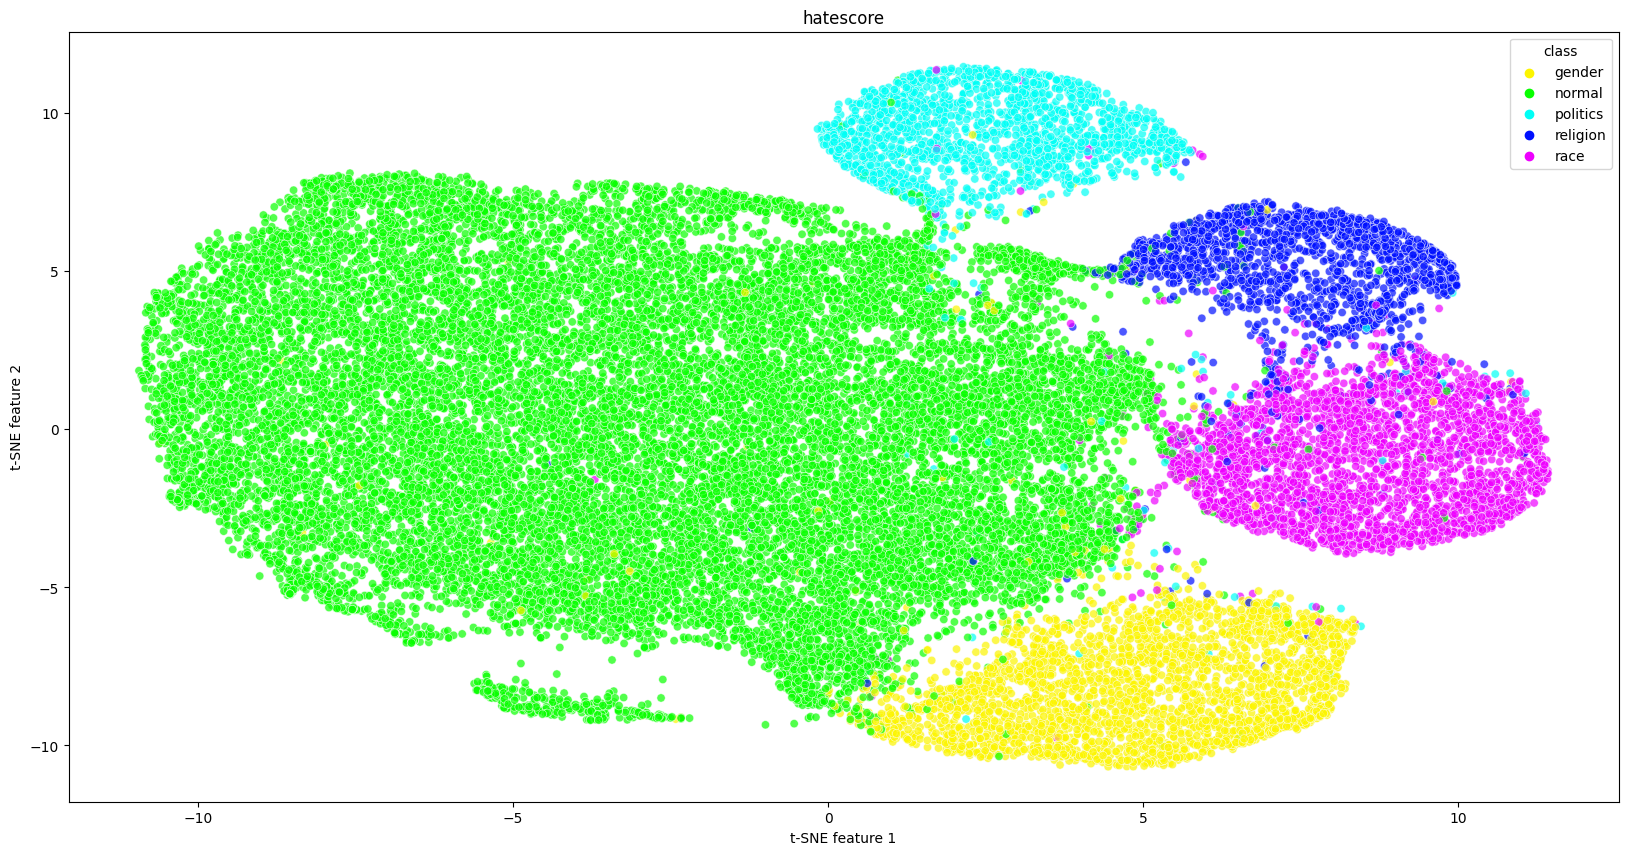

In [22]:
class_list = kold_df['class']
visulize_sentences("hatescore",matrix, class_list, {
 0 : "normal", 1: "gender", 2: "race" , 3:"religion", 4: "age", 5:"politics"
})